In [283]:
from pprint import pprint
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.display import display

#preprocessing for model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

#tensorflow libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense





In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
working_df = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [10]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=True, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

def make_confusion_matrix(model,y_actual, y_predict,labels=[1, 0], cmap='Blues'):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    #y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    ##  Function to calculate accuracy score

In [11]:
def make_summary_cols(df, cat_threshold=20):
    '''Create a df to summarise the data df based on dtypes, nulls, numeric or not, categorical or not

    df: data threshold
    cat_threshold: number of unique types below which assume categorical

    returns:
    summary_cols: df of summary
    d: dict of column names where keys are numeric_cols, categorical_cols and non_numeric_cols where
    values against the keys contain corresponding column names
    '''
    types = df.dtypes
    types.name = 'col_types'

    nuniques = data.nunique()
    nuniques.name = 'n_uniques'

    nulls = df.isnull().sum()
    nulls.name = 'nulls'

    summary_cols = pd.merge(left=pd.merge(left=nuniques, right=types, left_index=True, right_index=True), right=nulls,\
                            left_index=True, right_index=True).sort_values(by='col_types')
    summary_cols['isnumeric_column'] = summary_cols['col_types'].apply(lambda x: False if x=='object' else True)

    summary_cols['probably_categorical'] = summary_cols['n_uniques'].apply(lambda x: True if x <=cat_threshold \
        else False)

    d = {
        'numeric_cols': list(summary_cols[summary_cols.isnumeric_column==True].index),
        'categorical_cols': list(summary_cols[summary_cols.probably_categorical==True].index),
        'non_numeric_cols': list(summary_cols[summary_cols.isnumeric_column==False].index)
    }

    return summary_cols, d

In [12]:
summary_df, d = make_summary_cols(working_df)

In [13]:
summary_df

,n_uniques,col_types,nulls,isnumeric_column,probably_categorical
CreditScore,460,int64,0,True,False
Age,70,int64,0,True,False
Tenure,11,int64,0,True,True
NumOfProducts,4,int64,0,True,True
HasCrCard,2,int64,0,True,True
IsActiveMember,2,int64,0,True,True
Exited,2,int64,0,True,True
Balance,6382,float64,0,True,False
EstimatedSalary,9999,float64,0,True,False
Geography,3,object,0,False,True


In [14]:
numeric_cols = d['numeric_cols']
categorical_cols = d['categorical_cols']
non_numeric_cols = d['non_numeric_cols']

In [15]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Balance',
 'EstimatedSalary']

In [16]:
categorical_cols

['Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Geography',
 'Gender']

In [17]:
non_numeric_cols

['Geography', 'Gender']

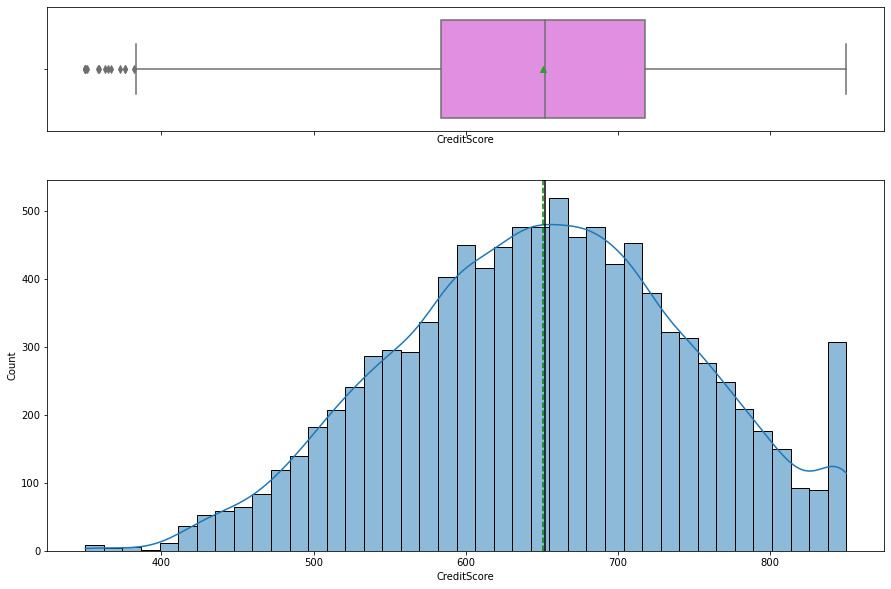

In [18]:
histogram_boxplot(working_df.CreditScore)

In [19]:
px.box(working_df.CreditScore, orientation='h', height=200)

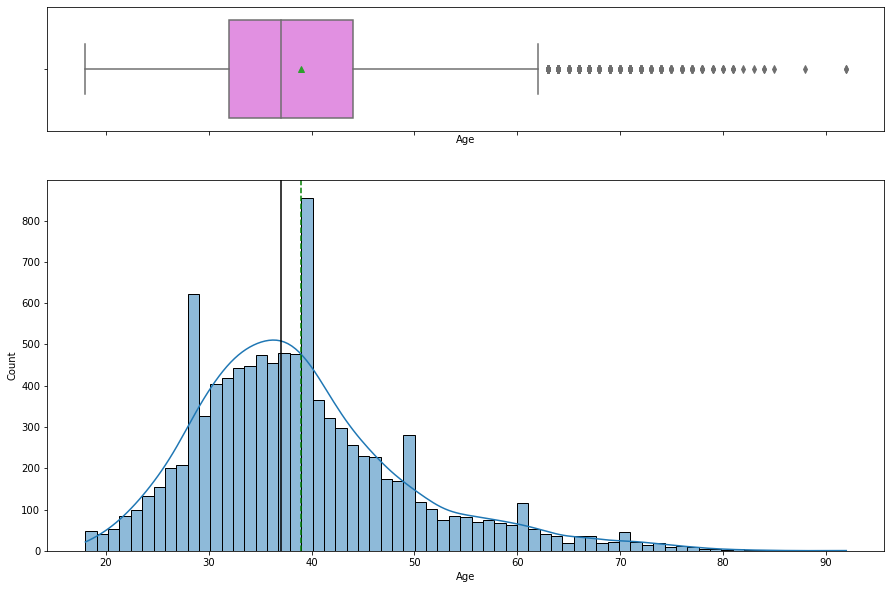

In [20]:
histogram_boxplot(working_df.Age)

In [21]:
px.box(working_df.Age, orientation='h', height=200)

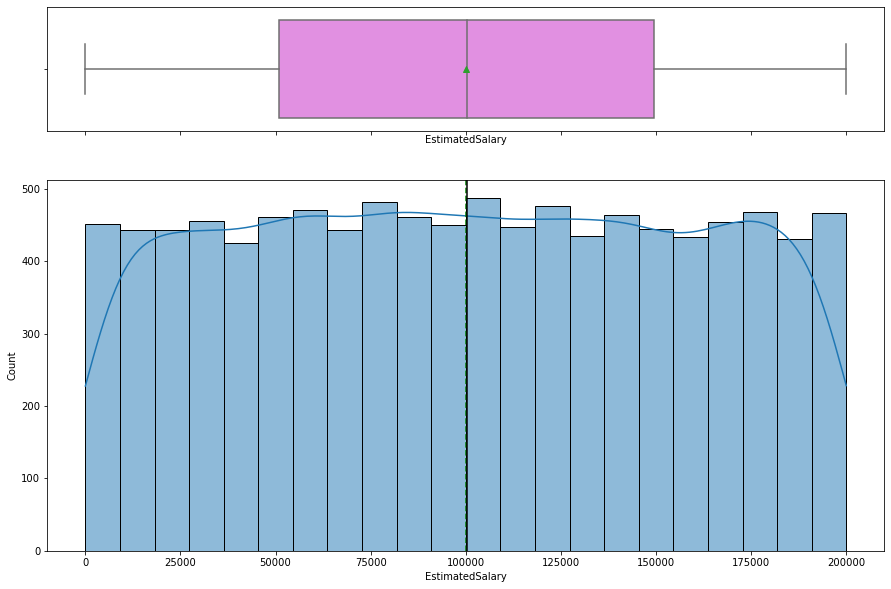

In [22]:
histogram_boxplot(working_df.EstimatedSalary)

In [23]:
px.box(working_df.EstimatedSalary,orientation='h',height=200)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Proportion'>

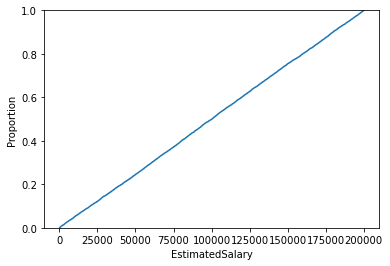

In [24]:
sns.ecdfplot(data=working_df,x='EstimatedSalary')

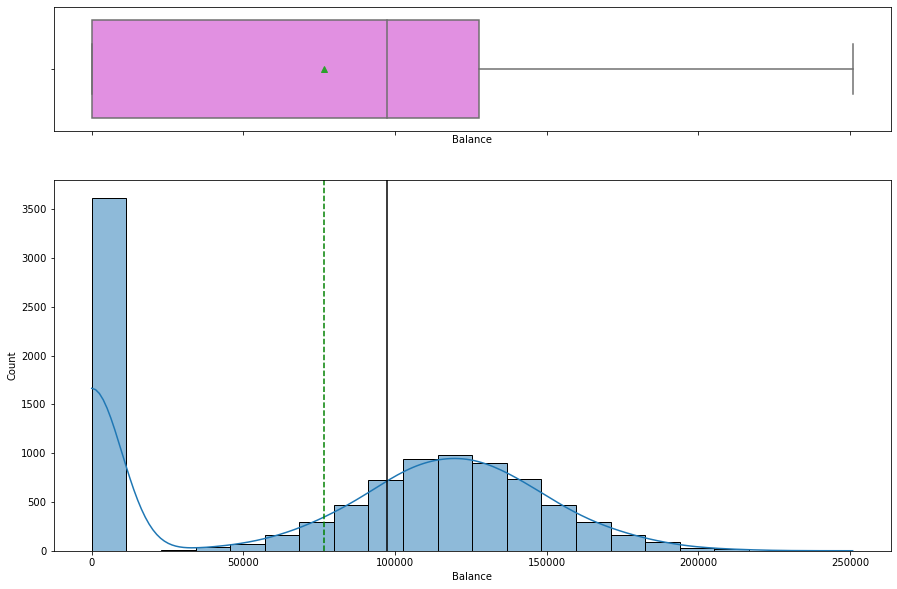

In [25]:
histogram_boxplot(working_df.Balance)

In [26]:
px.box(working_df.Balance, orientation='h', height=200)

<AxesSubplot:xlabel='Balance', ylabel='Proportion'>

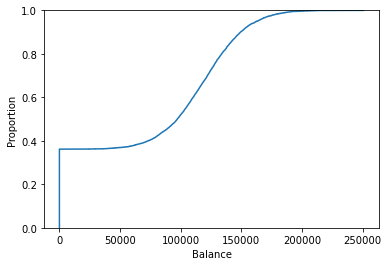

In [27]:
sns.ecdfplot(working_df.Balance)

In [28]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

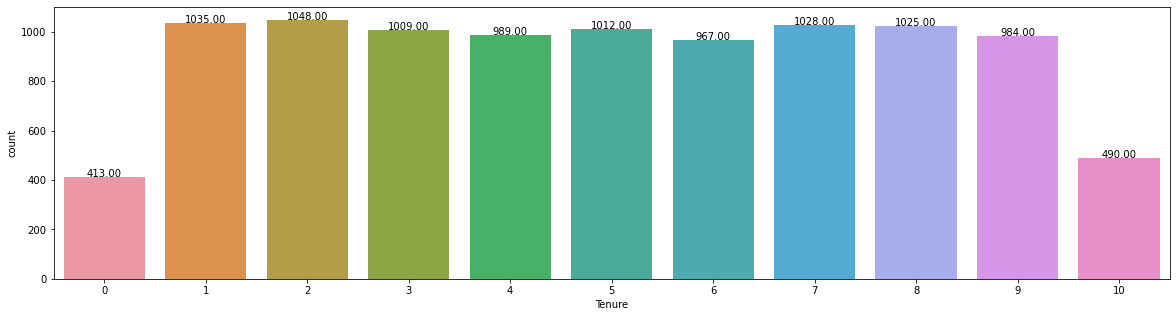

In [29]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.Tenure)
show_values_on_bars(zz)

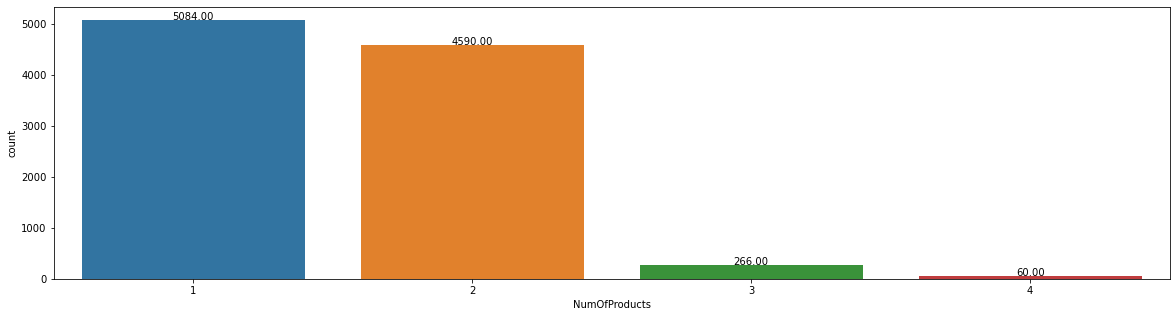

In [30]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.NumOfProducts)
show_values_on_bars(zz)

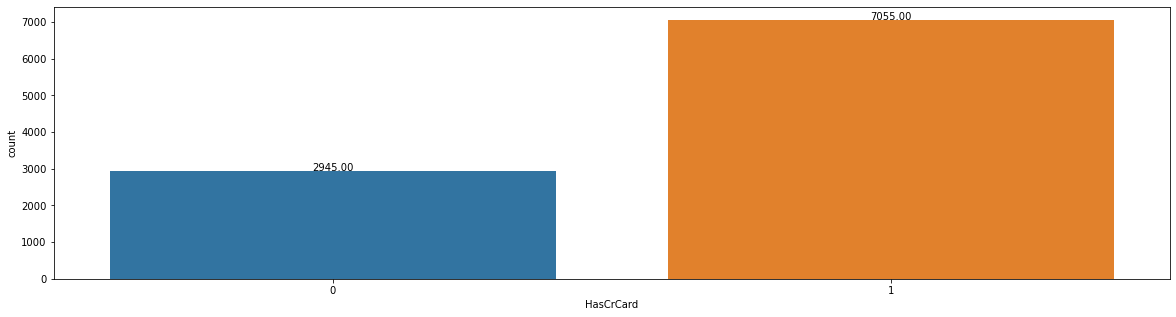

In [31]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.HasCrCard)
show_values_on_bars(zz)

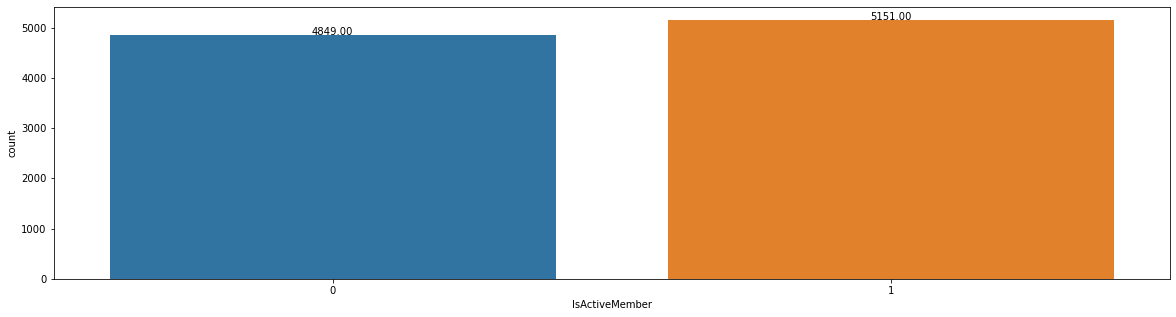

In [32]:

plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.IsActiveMember)
show_values_on_bars(zz)

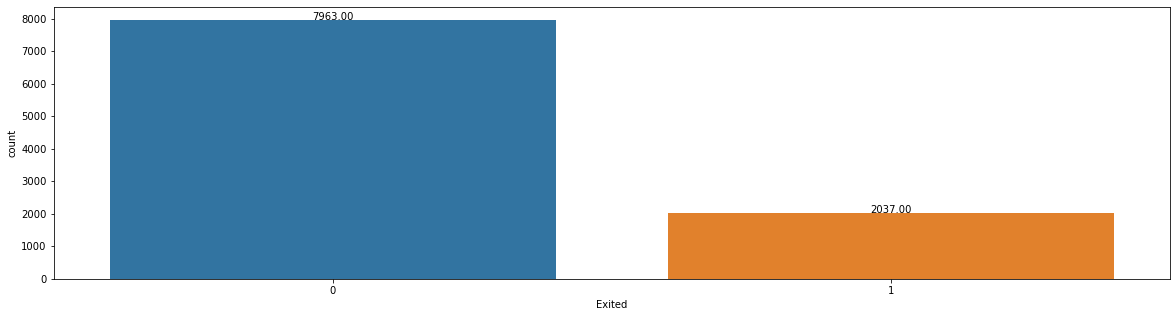

In [33]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.Exited)
show_values_on_bars(zz)

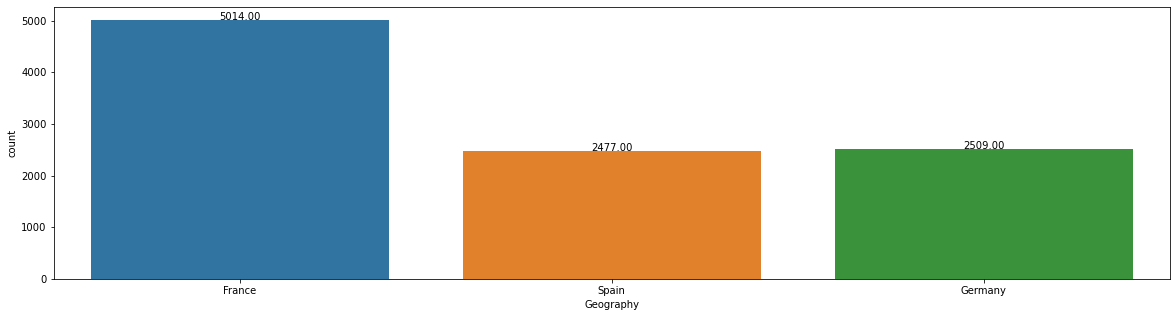

In [34]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.Geography)
show_values_on_bars(zz)

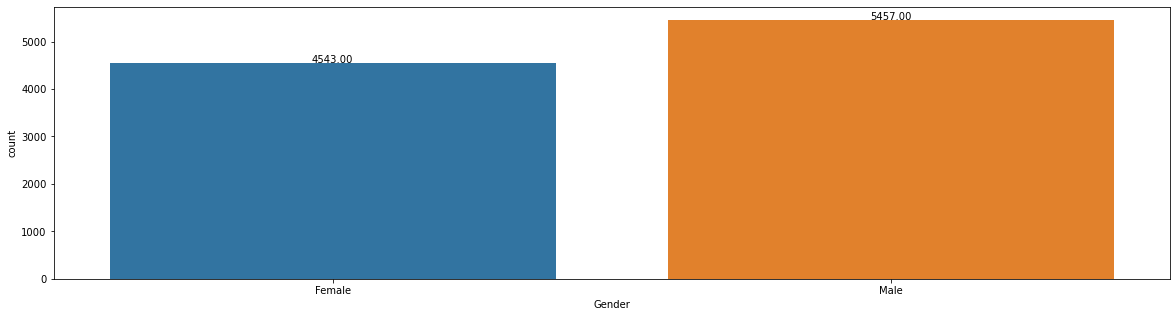

In [35]:
plt.figure(figsize=(20,5))
zz=sns.countplot(x=working_df.Gender)
show_values_on_bars(zz)

In [39]:
sns.pairplot(working_df,corner=True,diag_kind='kde')

KeyboardInterrupt: 

<AxesSubplot:>

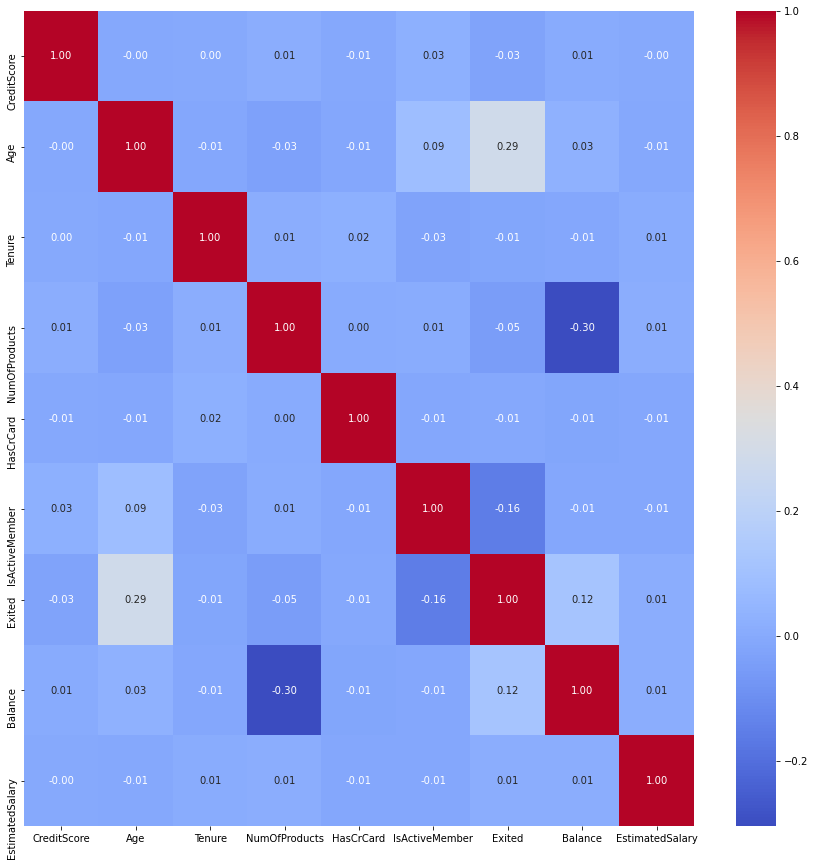

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(working_df.loc[:,numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [42]:
X = working_df.drop('Exited', axis=1)
y = working_df.Exited
X = pd.get_dummies(X, drop_first=True)
random_state = 314159

In [43]:
exited_0 = working_df[working_df.Exited==0].shape[0]
exited_0
exited_1 = working_df[working_df.Exited==1].shape[0]
exited_1

inv_class_weights = {
    0: exited_1 / (exited_0 + exited_1),
    1: exited_0 / (exited_1 + exited_0)
}

inv_class_weights

{0: 0.2037, 1: 0.7963}

In [44]:

scaler = MinMaxScaler()

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/3, stratify=y, random_state=random_state)

In [46]:
X_test
## check split same in ttrain and test for tgt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9762,708,21,8,133974.36,2,1,0,50294.09,1,0,1
1799,850,39,10,0.00,2,1,1,143030.09,0,1,0
3704,604,34,7,0.00,2,1,0,193021.49,0,0,0
1495,685,57,7,101868.51,1,0,1,113483.96,1,0,1
2800,769,51,9,156773.78,2,1,0,40257.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1063,812,34,5,103818.43,1,1,1,166038.27,0,0,1
2632,638,48,2,0.00,2,1,1,7919.08,0,1,1
8847,457,40,10,134320.23,2,1,0,150757.35,0,0,1
4336,580,38,9,115442.19,2,1,0,128481.50,1,0,1


In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [366]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=[Recall()])

history1 = model1.fit(X_train, y_train, epochs=100, use_multiprocessing=True, class_weight=inv_class_weights, validation_split=0.1)



Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.2087 - recall_10: 0.6217 - val_loss: 0.5729 - val_recall_10: 0.5986
Epoch 2/100
188/188 [==============================] - 0s 994us/step - loss: 0.1757 - recall_10: 0.7132 - val_loss: 0.6220 - val_recall_10: 0.8435
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1634 - recall_10: 0.7367 - val_loss: 0.4690 - val_recall_10: 0.6667
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1578 - recall_10: 0.7624 - val_loss: 0.5364 - val_recall_10: 0.7211
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1571 - recall_10: 0.6992 - val_loss: 0.6032 - val_recall_10: 0.8027
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1542 - recall_10: 0.7405 - val_loss: 0.6218 - val_recall_10: 0.7483
Epoch 7/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1628 - recall_10: 0.7210 - val_loss: 0.5011 - val_r

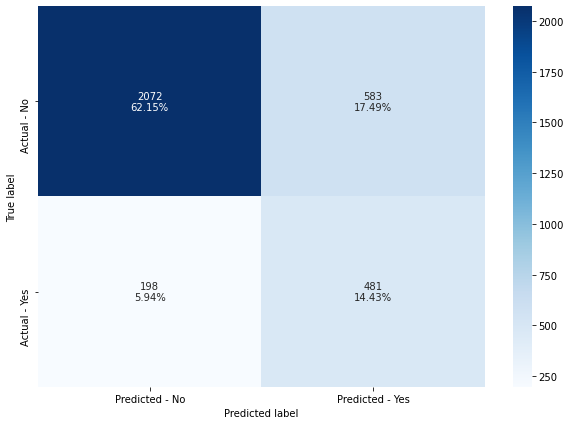

In [367]:
y_predict_prob = model1.predict(X_test)

threshold = 0.5
y_predict=[]
for elt in y_predict_prob:
    if elt <=threshold:
        y_predict.append(0)
    else:
        y_predict.append(1)

make_confusion_matrix(model1,y_test,y_predict)

In [368]:
history1.history.keys()

dict_keys(['loss', 'recall_10', 'val_loss', 'val_recall_10'])

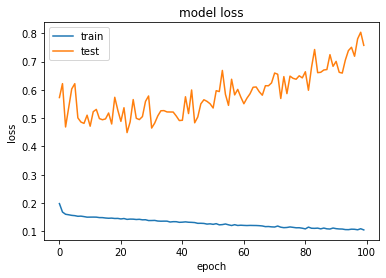

note that using class weights has no effect on validation loss hence the large divergence


In [369]:
# summarize history for loss - source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('note that using class weights has no effect on validation loss hence the large divergence') #source: keras docs: class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

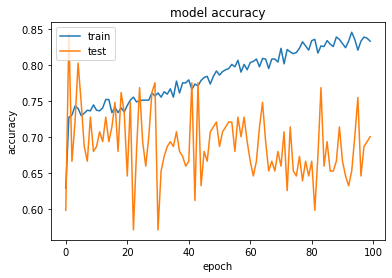

In [370]:
# summarize history for accuracy
plt.plot(history1.history['recall_10'])
plt.plot(history1.history['val_recall_10'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [371]:
model2 = Sequential()
model2.add(Dense(X_train.shape[1],activation='relu'))
model2.add(Dense(16,activation ='relu'))
model2.add(Dense(8, activation ='relu'))
model2.add(Dense(4, activation ='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [372]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=[Precision(), Recall()])#metrics=['binary_accuracy']

In [373]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=250, verbose=1, use_multiprocessing=True, validation_split=0.33, class_weight=inv_class_weights) 

Epoch 1/100
18/18 [==============================] - 1s 19ms/step - loss: 0.2237 - precision_14: 0.2240 - recall_11: 0.8729 - val_loss: 0.6971 - val_precision_14: 0.2710 - val_recall_11: 0.7582
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2184 - precision_14: 0.2922 - recall_11: 0.7369 - val_loss: 0.6569 - val_precision_14: 0.3166 - val_recall_11: 0.6220
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2056 - precision_14: 0.3077 - recall_11: 0.6028 - val_loss: 0.6383 - val_precision_14: 0.3296 - val_recall_11: 0.6549
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1976 - precision_14: 0.3406 - recall_11: 0.6557 - val_loss: 0.6421 - val_precision_14: 0.3279 - val_recall_11: 0.7055
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1904 - precision_14: 0.3758 - recall_11: 0.6988 - val_loss: 0.5160 - val_precision_14: 0.4327 - val_recall_11: 0.5582
Epoch 6/100
18/18 [===============

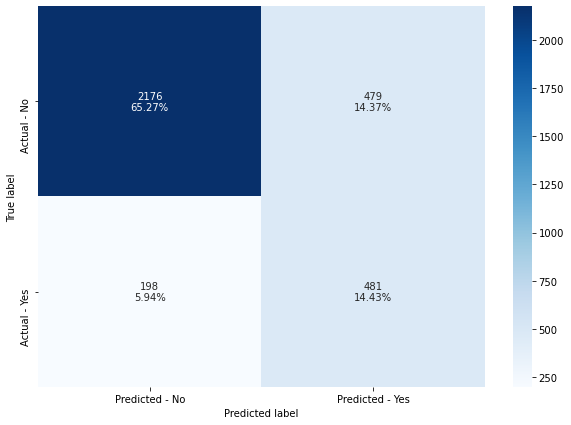

In [374]:
y_predict_prob = model2.predict(X_test)



y_predict=[]
for elt in y_predict_prob:
    if elt <=threshold:
        y_predict.append(0)
    else:
        y_predict.append(1)

##pprint(y_predict)
make_confusion_matrix(model2, y_test, y_predict)

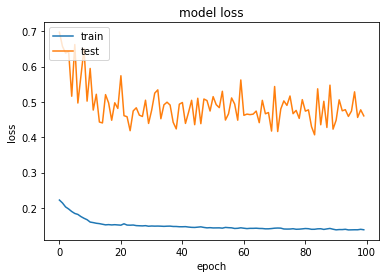

note that using class weights has no effect on validation loss hence the large divergence


In [375]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('note that using class weights has no effect on validation loss hence the large divergence')#source: keras docs: class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

In [376]:
# summarize history for accuracy
plt.plot(history2.history['binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'binary_accuracy'

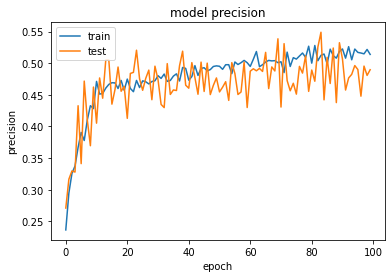

In [381]:
# summarize history for accuracy
plt.plot(history2.history['precision_14'])
plt.plot(history2.history['val_precision_14'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

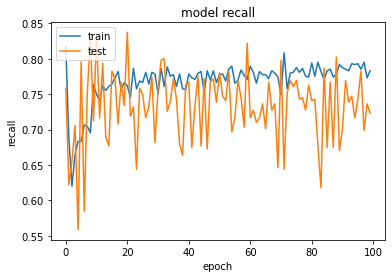

In [382]:
# summarize history for accuracy
plt.plot(history2.history['recall_11'])
plt.plot(history2.history['val_recall_11'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [380]:
history2.history.keys()


dict_keys(['loss', 'precision_14', 'recall_11', 'val_loss', 'val_precision_14', 'val_recall_11'])

# Bank Churn Prediction
## Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data Dictionary:
* RowNumber: Row number.
* CustomerId: Unique identification key for different customers.
* Surname: Surname of the customer
* Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* Geography: The country to which the customer belongs.
* Gender: The gender of the customer.
* Age: Age of the customer.
* Tenure: The period of time a customer has been associated with the bank.
* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
* NumOfProducts: How many accounts, bank account affiliated products the person has.
* HasCrCard: Does the customer have a credit card through the bank?
* IsActiveMember: Subjective, but for the concept
* EstimatedSalary: Estimated salary of the customer.
* Exited: Did they leave the bank after all?

## Points Distribution:
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)
